In [ ]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import mesh
import geometry

Text(0.5, 1.0, '$\\alpha > \\beta$')

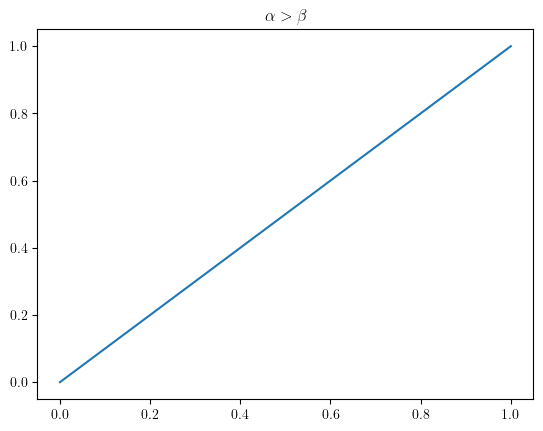

In [ ]:
# test latex rendering
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

In [ ]:
rect = geometry.Rectangle(4,3)
Mesh = mesh.Mesh(rect, "quadrilateral", 0.3)

Mesh.plot()
Mesh.print()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_of_elements = []
n_of_nodes    = []
for i in np.logspace(1,10,10):
    rect = geometry.Rectangle(4,3)
    Mesh = mesh.Mesh(rect, "triangle", (i+1)**(1/16) / 10)
    n_of_elements.append(len(Mesh.elements))
    n_of_nodes.append(len(Mesh.node_coords))

plt.scatter(n_of_nodes, n_of_elements)
m,b = np.polyfit(n_of_nodes, n_of_elements, 1)
print(m,b)
print(n_of_elements, n_of_nodes)

In [ ]:
T    = geometry.T_profile(4,9,20,3)
Mesh = mesh.Mesh(T, "quadrilateral", 1)

Mesh.plot()
Mesh.print()

In [ ]:
H    = geometry.H_beam(0.5,8,10,0.8)
Mesh = mesh.Mesh(H, "quadrilateral", 0.25)

Mesh.plot()
Mesh.print()

In [ ]:
points = [( 0.0, 0.0), 
          ( 5.0, 0.0),
          ( 5.0, 0.75), 
          ( 0.75, 0.75), 
          ( 0.575, 0.825), 
          ( 0.5, 1.0),
          ( 0.5, 9.0),
          ( 0.575, 9.175),
          ( 0.75, 9.25),
          ( 5.0, 9.25),
          ( 5.0,10.0),
          ( 0.0,10.0)]

poly = geometry.Polygon(points)
Mesh = mesh.Mesh(poly, "quadrilateral", 0.25)

Mesh.plot()
Mesh.print()

In [ ]:
ReinforcedConcrete = geometry.ReinforcedConcreteColumn(width  = 30, 
                                                       height = 30, 
                                                       concrete_cover = 3,
                                                       rebar_diameter = 2,
                                                       rebar_spacing  = 5)
Mesh = mesh.Mesh(ReinforcedConcrete, "triangle", 2.5)
Mesh.plot()
Mesh.print()

In [ ]:
L = geometry.L_Beam(100, 75, 8, 8, 5, 12.95)
Mesh = mesh.Mesh(L, "triangle", 3)

Mesh.plot()
Mesh.print()

In [ ]:
L = geometry.L_Beam(65, 100, 9, 9, 4.5, 0)
Mesh = mesh.Mesh(L, "triangle", 2)

Mesh.plot()
Mesh.print()

In [ ]:
mesh_sizes = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

A   = []
I_x = []
I_y = []

for size in mesh_sizes:
    Mesh = mesh.Mesh(L, "triangle", size)

    a        = Mesh.get_A_numerical()
    i_x, i_y = Mesh.get_I_numerical()

    A.append(a)
    I_x.append(i_x)
    I_y.append(i_y)

plt.scatter(mesh_sizes, A)
plt.show()

plt.scatter(mesh_sizes, I_x)
plt.show()

plt.scatter(mesh_sizes, I_y)
plt.show()

In [ ]:
A_scale = []
I_x_scale = []
I_y_scale = []

for i in range(len(A)):
    A_scale.append(A[i] / 1414.8)
    I_x_scale.append(I_x[i] / 1406000)
    I_y_scale.append(I_y[i] /  467040)

In [ ]:
plt.scatter(mesh_sizes, A_scale )
plt.title("Variation of the Area")
plt.xlabel("mesh size")
plt.ylabel("variation of the Area in %")
plt.ylim(0.99, 1.01)
plt.grid()
plt.show()

plt.scatter(mesh_sizes, I_x_scale )
plt.title("Variation of the Moment of Intertia X")
plt.xlabel("mesh size")
plt.ylabel("variation of I_x in %")
plt.ylim(0.98, 1.02)
plt.grid()
plt.show()

plt.scatter(mesh_sizes, I_y_scale )
plt.title("Variation of the Moment of Intertia Y")
plt.xlabel("mesh size")
plt.ylabel("variation of I_y in %")
plt.ylim(0.98, 1.02)
plt.grid()
plt.show()